<a href="https://colab.research.google.com/github/huytuan3108/btap_AI/blob/main/Baitapvn_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow opencv-python matplotlib scikit-learn

In [2]:
from google.colab import files
import zipfile
import os

# Tải file ZIP từ máy lên Colab
uploaded = files.upload()  # Chọn file .zip của bạn

# Giải nén file ZIP
for filename in uploaded.keys():
    zip_path = filename
    extract_folder = filename.replace(".zip", "")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)

    print(f"✅ Giải nén hoàn tất vào thư mục: {extract_folder}")

# Kiểm tra thư mục đã giải nén
os.listdir(extract_folder)

Saving dataset.zip to dataset.zip
✅ Giải nén hoàn tất vào thư mục: dataset


['dataset']

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

In [4]:
def load_dataset(dataset_path, img_size):
    data = []
    labels = []
    label_map = {}
    label_id = 0

    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.isdir(folder_path):
            continue

        label_map[label_id] = folder.lower()

        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            face = cv2.resize(gray, (img_size, img_size))
            data.append(face)
            labels.append(label_id)

        label_id += 1

    X = np.array(data).reshape(-1, img_size, img_size, 1) / 255.0
    y = to_categorical(labels)
    return X, y, label_map

In [5]:
def create_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# ==================== 🎓 HUẤN LUYỆN MODEL NHẬN DIỆN NGƯỜI ====================
IMG_SIZE = 100

print(" Huấn luyện nhận diện người...")
# Corrected the path by removing the extra space
X_p, y_p, label_map_person = load_dataset("/content/dataset/dataset/dataset_person", IMG_SIZE)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2, random_state=42)

model_person = create_cnn((IMG_SIZE, IMG_SIZE, 1), len(label_map_person))
model_person.fit(X_train_p, y_train_p, epochs=100, validation_data=(X_test_p, y_test_p))
model_person.save("model_person.h5")

 Huấn luyện nhận diện người...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 733ms/step - accuracy: 0.1447 - loss: 1.6194 - val_accuracy: 0.1111 - val_loss: 1.9277
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.2500 - loss: 1.5575 - val_accuracy: 0.2222 - val_loss: 1.6260
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.2211 - loss: 1.5117 - val_accuracy: 0.2222 - val_loss: 1.5997
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.2789 - loss: 1.4144 - val_accuracy: 0.3333 - val_loss: 1.5370
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.8368 - loss: 1.3106 - val_accuracy: 0.5556 - val_loss: 1.4903
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.7685 - loss: 1.2074 - val_accuracy: 0.3333 - val_loss: 1.4410
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.7975 - loss: 1.0774 - val_accuracy: 0.4444 - val_loss: 1.4984
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.7500 - loss: 0.8607 - val_accuracy: 0.2222 - v

In [7]:
print("\n Huấn luyện nhận diện cảm xúc...")
X_e, y_e, label_map_emotion = load_dataset("/content/dataset/dataset/dataset_emotion", IMG_SIZE)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_e, y_e, test_size=0.2, random_state=42)

model_emotion = create_cnn((IMG_SIZE, IMG_SIZE, 1), len(label_map_emotion))
model_emotion.fit(X_train_e, y_train_e, epochs=100, validation_data=(X_test_e, y_test_e))
model_emotion.save("model_emotion.h5")


 Huấn luyện nhận diện cảm xúc...
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 673ms/step - accuracy: 0.2789 - loss: 1.1763 - val_accuracy: 0.2222 - val_loss: 1.8216
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 486ms/step - accuracy: 0.3553 - loss: 1.5041 - val_accuracy: 0.2222 - val_loss: 1.3183
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step - accuracy: 0.3762 - loss: 1.1727 - val_accuracy: 0.4444 - val_loss: 1.0877
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.2870 - loss: 1.0996 - val_accuracy: 0.3333 - val_loss: 1.0948
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.3472 - loss: 1.1052 - val_accuracy: 0.3333 - val_loss: 1.1025
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 0.3368 - loss: 1.0896 - val_accuracy: 0.3333 - val_loss: 1.1024
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 410ms/step - accuracy: 0.3264 - loss: 1.0537 - val_accuracy: 0.3333 - val_loss: 1.0806
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 492ms/step - accuracy: 0.5475 - loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
 Đây là TRIỀU và đang cảm thấy HAPPY


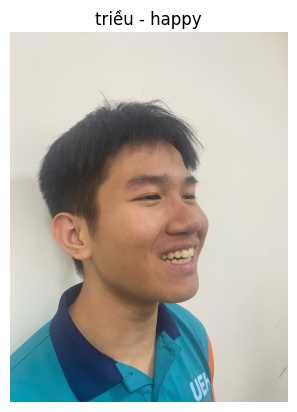

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
 Đây là TUẤN và đang cảm thấy NORMAL


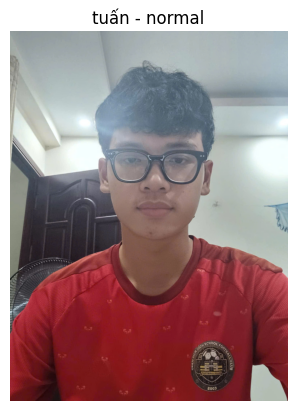

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
 Đây là NHÂN và đang cảm thấy HAPPY


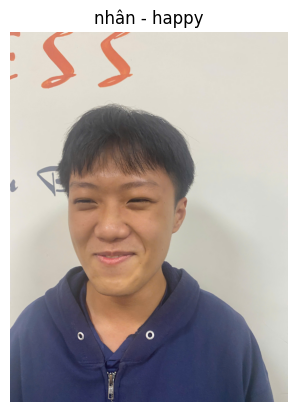

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
 Đây là QUÂN và đang cảm thấy NORMAL


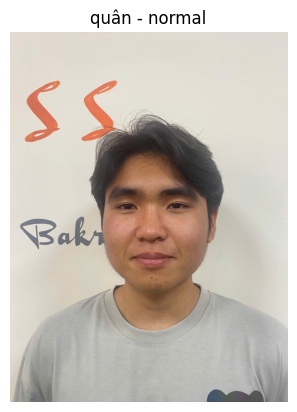

In [11]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
    input_face = face.reshape(1, IMG_SIZE, IMG_SIZE, 1) / 255.0

    pred_person = model_person.predict(input_face)
    name = label_map_person[np.argmax(pred_person)]

    pred_emotion = model_emotion.predict(input_face)
    emotion = label_map_emotion[np.argmax(pred_emotion)]

    print(f" Đây là {name.upper()} và đang cảm thấy {emotion.upper()}")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{name} - {emotion}")
    plt.axis("off")
    plt.show()
predict_image("/content/dfb405a33d2c8e72d73d.jpg")
predict_image("/content/f2952a8f1200a15ef811.jpg")
predict_image("/content/e9a710b0283f9b61c22e.jpg")
predict_image("/content/e088f490cc1f7f41260e.jpg")
